In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


1. Dataset Overview:
   - Number of listings: 9198
   - Number of features: 9
   - Date range: ['October 2016' 'March 2016' 'September 2012' 'November 2016' 'May 2013'
 'July 2011' 'September 2016' 'February 2016' 'August 2012' 'August 2014'
 'October 2015' 'January 2013' 'August 2016' 'July 2015' 'September 2014'
 'September 2011' 'May 2014' 'October 2013' 'June 2016' 'February 2015'
 'December 2016' 'December 2015' 'July 2016' 'November 2015'
 'January 2016' 'June 2014' 'May 2011' 'April 2010' 'March 2014'
 'June 2015' 'April 2016' 'May 2016' 'November 2014' 'September 2015'
 'October 2014' 'February 2014' 'January 2015' 'August 2015' 'April 2013'
 'December 2011' 'April 2014' 'April 2015' 'October 2012' 'May 2015'
 'March 2012' 'December 2012' 'July 2014' 'March 2015' 'November 2013'
 'December 2014' 'April 2012' 'June 2013' 'June 2012' 'December 2010'
 'December 2013' 'September 2013' 'February 2011' 'February 2012'
 'March 2013' 'January 2012' 'August 2013' 'January 2014' 'May 20

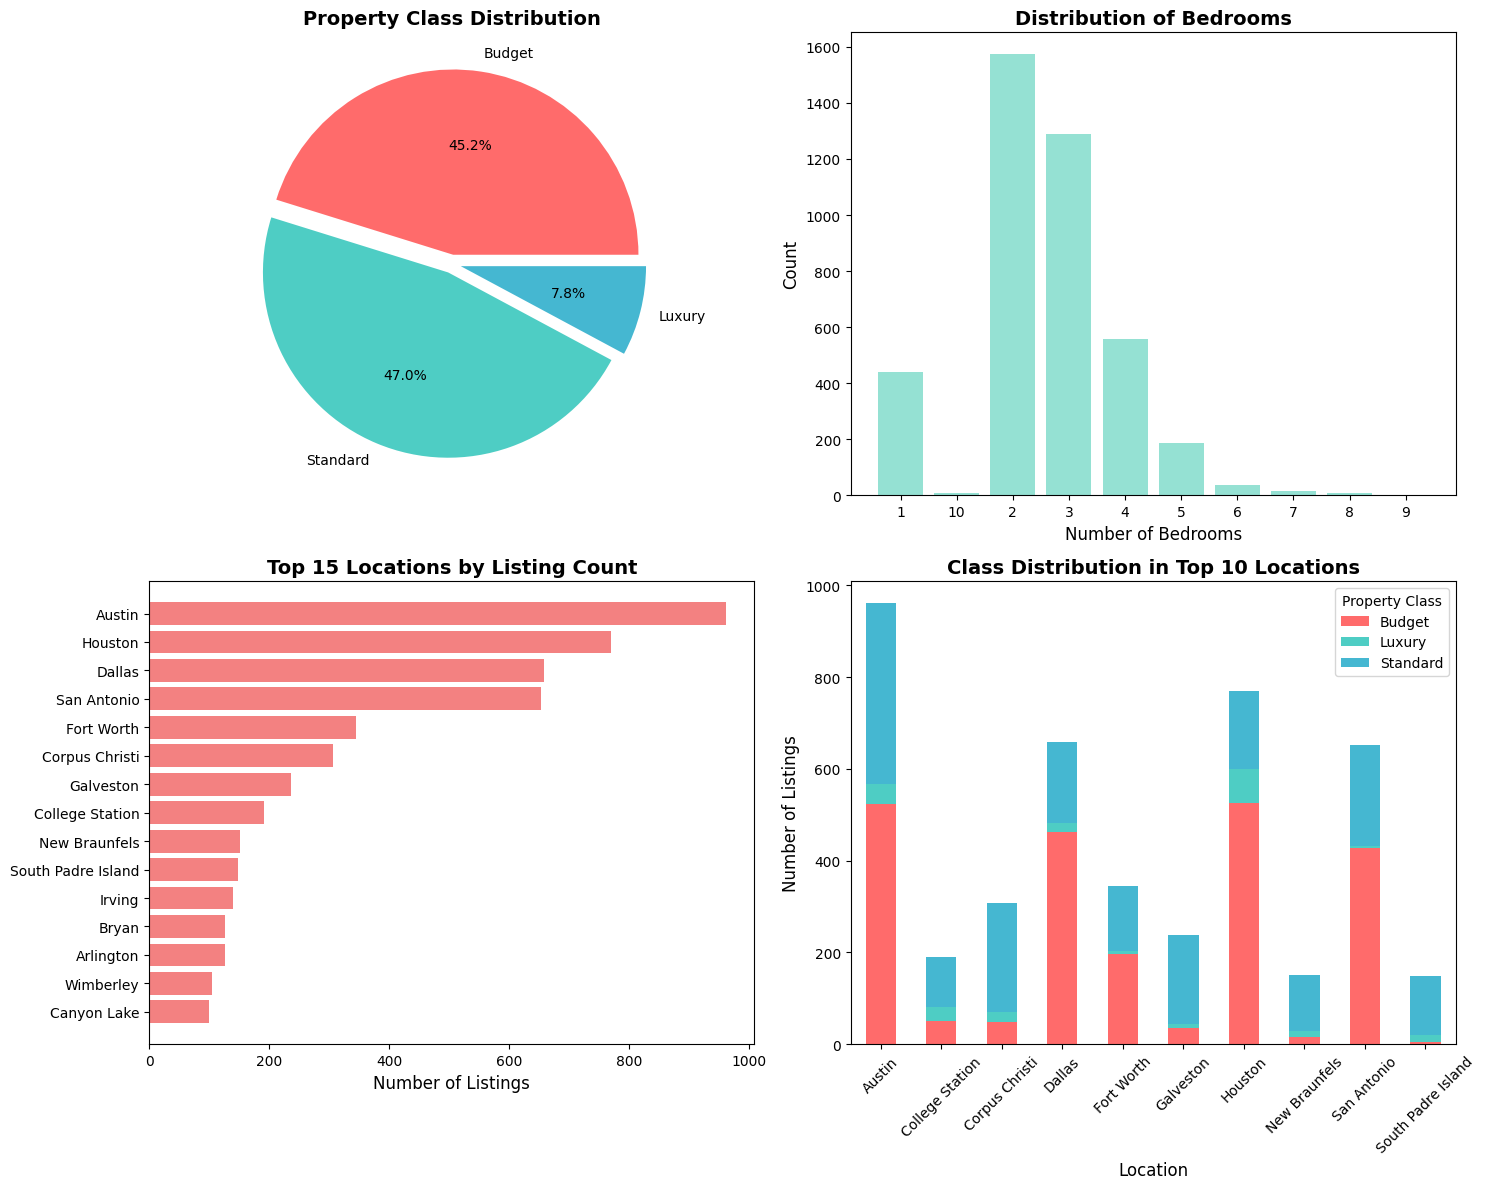


4. Geographic Anomalies:
   Listings with invalid coordinates: 1608 (17.5%)

5. Temporal Distribution:
   June 2016: 351 listings
   May 2016: 339 listings
   February 2016: 320 listings
   January 2016: 320 listings
   April 2016: 299 listings
   September 2015: 298 listings
   October 2016: 297 listings
   December 2015: 296 listings
   August 2016: 294 listings
   July 2015: 293 listings
   March 2016: 292 listings
   July 2016: 289 listings
   September 2016: 261 listings
   December 2016: 250 listings
   November 2015: 234 listings
   August 2015: 225 listings
   November 2016: 221 listings
   June 2015: 218 listings
   October 2015: 207 listings
   May 2015: 197 listings
   April 2015: 190 listings
   January 2015: 168 listings
   March 2015: 168 listings
   October 2014: 161 listings
   July 2014: 134 listings
   September 2014: 132 listings
   May 2014: 129 listings
   February 2015: 126 listings
   June 2014: 121 listings
   August 2014: 120 listings
   March 2014: 119 listin

In [10]:
#understand the training data and performing the analysis for visualisation

# 1. Basic Information
train_df = pd.read_csv('Test1 1\\Test1\\train.csv',encoding='cp1252')
print("\n1. Dataset Overview:")
print(f"   - Number of listings: {len(train_df)}")
print(f"   - Number of features: {len(train_df.columns)}")
print(f"   - Date range: {train_df['ListingDate'].unique()}")

# 2. Missing Values Analysis
print("\n2. Missing Values:")
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values(by='Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

# 3. Class Distribution
print("\n3. Property Class Distribution:")
class_dist = train_df['Class'].value_counts().sort_index()
class_labels = {1: 'Budget', 2: 'Standard', 3: 'Luxury'}
for cls, count in class_dist.items():
    pct = (count / len(train_df)) * 100
    print(f"   Class {cls} ({class_labels[cls]}): {count} ({pct:.1f}%)")



#Making visualisations
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Class distribution pie chart
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = ax1.pie(class_dist.values, 
                                    labels=[class_labels[i] for i in class_dist.index],
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=(0.05, 0.05, 0.05))
ax1.set_title('Property Class Distribution', fontsize=14, fontweight='bold')

# Bedrooms distribution
ax2 = axes[0, 1]
bedroom_counts = train_df['Bedrooms'].value_counts().sort_index()

# Handle 'Studio' separately
if 'Studio' in bedroom_counts.index:
    studio_count = bedroom_counts['Studio']
    bedroom_counts = bedroom_counts.drop('Studio')
    bedroom_counts[0] = studio_count  # Represent Studio as 0 bedrooms

ax2.bar(bedroom_counts.index, bedroom_counts.values, color='#95E1D3')
ax2.set_xlabel('Number of Bedrooms', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Distribution of Bedrooms', fontsize=14, fontweight='bold')
ax2.set_xticks(list(bedroom_counts.index))

# Top 15 locations
ax3 = axes[1, 0]
top_locations = train_df['Location'].value_counts().head(15)
ax3.barh(range(len(top_locations)), top_locations.values, color='#F38181')
ax3.set_yticks(range(len(top_locations)))
ax3.set_yticklabels(top_locations.index, fontsize=10)
ax3.set_xlabel('Number of Listings', fontsize=12)
ax3.set_title('Top 15 Locations by Listing Count', fontsize=14, fontweight='bold')
ax3.invert_yaxis()

# Class distribution by top locations
ax4 = axes[1, 1]
top_10_locations = train_df['Location'].value_counts().head(10).index
location_class_data = []
for loc in top_10_locations:
    loc_data = train_df[train_df['Location'] == loc]['Class'].value_counts()
    for cls in [1, 2, 3]:
        location_class_data.append({
            'Location': loc,
            'Class': class_labels[cls],
            'Count': loc_data.get(cls, 0)
        })

loc_class_df = pd.DataFrame(location_class_data)
pivot_data = loc_class_df.pivot(index='Location', columns='Class', values='Count')
pivot_data.plot(kind='bar', stacked=True, ax=ax4, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax4.set_xlabel('Location', fontsize=12)
ax4.set_ylabel('Number of Listings', fontsize=12)
ax4.set_title('Class Distribution in Top 10 Locations', fontsize=14, fontweight='bold')
ax4.legend(title='Property Class')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Geographic Analysis
print("\n4. Geographic Anomalies:")
lat_lon_anomalies = train_df[
    (train_df['Latitude'] == -999999) | 
    (train_df['Longitude'] == -999999) |
    (train_df['Latitude'].isna()) |
    (train_df['Longitude'].isna())
]
print(f"   Listings with invalid coordinates: {len(lat_lon_anomalies)} ({len(lat_lon_anomalies)/len(train_df)*100:.1f}%)")

# 5. Temporal Analysis
print("\n5. Temporal Distribution:")
date_counts = train_df['ListingDate'].value_counts()
for date, count in date_counts.items():
    print(f"   {date}: {count} listings")


In [11]:
#Now since we understand the data we need to clean it 

def cleaning_data(df):
    df_clean = df.copy()

    # 1. Handle 'Studio' in Bedrooms by turning them into 0
    print("\n1. Converting 'Studio' to 0 bedrooms...")
    df_clean['Bedrooms'] = df_clean['Bedrooms'].replace('Studio', 0)
    df_clean['Bedrooms'] = pd.to_numeric(df_clean['Bedrooms'], errors='coerce')

    # 2. Handle missing bedrooms by adding the most occuring bedroom type into the data
    print("2. Imputing missing bedroom values...")
    bedroom_imputer = SimpleImputer(strategy='median')
    df_clean['Bedrooms'] = bedroom_imputer.fit_transform(df_clean[['Bedrooms']])

    # 3. Handle invalid coordinates by first changing them into Nan so that I can 
    print("3. Handling invalid coordinates...")
    # Replace -999999 with NaN
    df_clean.loc[df_clean['Latitude'] == -999999, 'Latitude'] = np.nan
    df_clean.loc[df_clean['Longitude'] == -999999, 'Longitude'] = np.nan

    # Impute coordinates by location average so group by location, calc lat avg and long avg then use those as per Nan lats and longs
    location_coords = df_clean.groupby('Location')[['Latitude', 'Longitude']].agg({
        'Latitude': lambda x: x[x.notna()].mean() if x[x.notna()].any() else np.nan,
        'Longitude': lambda x: x[x.notna()].mean() if x[x.notna()].any() else np.nan
    })

    for idx, row in df_clean.iterrows():
        if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
            loc = row['Location']
            if loc in location_coords.index:
                if pd.isna(row['Latitude']):
                    df_clean.loc[idx, 'Latitude'] = location_coords.loc[loc, 'Latitude']
                if pd.isna(row['Longitude']):
                    df_clean.loc[idx, 'Longitude'] = location_coords.loc[loc, 'Longitude']

    # For any remaining NaN coordinates, use overall mean - so locations that may not have been able to be catered for from thr above code
            lat_mean = df_clean['Latitude'][df_clean['Latitude'].notna()].mean()
            lon_mean = df_clean['Longitude'][df_clean['Longitude'].notna()].mean()
            df_clean['Latitude'].fillna(lat_mean, inplace=True)
            df_clean['Longitude'].fillna(lon_mean, inplace=True)
            
    return df_clean


In [12]:
#Feature engineering time to get more accurate features and convert them to catergorical variables
def feature_engineering(df):
    df_clean = df.copy()
    
    # Extract text features from Title and Description
    df_clean['title_length'] = df_clean['Title'].fillna('').str.len()
    df_clean['desc_length'] = df_clean['Description'].fillna('').str.len()
    df_clean['title_word_count'] = df_clean['Title'].fillna('').str.split().str.len()
    df_clean['desc_word_count'] = df_clean['Description'].fillna('').str.split().str.len()

    # Create luxury indicator words
    luxury_words = ['luxury', 'premium', 'deluxe', 'elegant', 'upscale', 'executive', 
                    'spacious', 'beautiful', 'stunning', 'amazing', 'gorgeous']
    budget_words = ['budget', 'cheap', 'affordable', 'economic', 'basic', 'simple', 'cozy']

    df_clean['luxury_word_count'] = df_clean['Description'].fillna('').str.lower().apply(
        lambda x: sum(word in x for word in luxury_words)
    )
    df_clean['budget_word_count'] = df_clean['Description'].fillna('').str.lower().apply(
        lambda x: sum(word in x for word in budget_words)
    )

    # Location features
    location_counts = train_df['Location'].value_counts()
    df_clean['location_popularity'] = df_clean['Location'].map(location_counts)

    # Date features (convert to numeric)
    month_map = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }

    df_clean['listing_month'] = df_clean['ListingDate'].str.split().str[0].str[0:3].map(month_map)
    df_clean['listing_year'] = df_clean['ListingDate'].str.split().str[1].astype(int)

    return df_clean


In [13]:
# 5. Encode categorical variables
#print("5. Encoding categorical variables...")

def encodingcats(df_train,df_test):
# Encode high-cardinality location feature

    df_enc_train = df_train.copy()
    df_enc_test = df_test.copy()

    # For training data, fit the encoder 
    location_encoder = LabelEncoder()
    df_enc_train['location_encoded'] = location_encoder.fit_transform(df_enc_train['Location'])
  #  self.label_encoders['location'] = location_encoder

    #For testing data, call the encoder as per the training data fit and make sure unknowns are sorted
    df_enc_test['location_encoded'] = df_enc_test['Location'].apply(
            lambda x: location_encoder.transform([x])[0] if x in location_encoder.classes_ else -1)
    
    
    return df_enc_train,df_enc_test




In [28]:
#Preparing features and building and training the Models!

def building_training_model(df_train):
    df = df_train.copy()
    feature_columns = ['Bedrooms', 'Latitude', 'Longitude', 
                'title_length', 'desc_length', 'title_word_count', 'desc_word_count',
                'luxury_word_count', 'budget_word_count', 'location_popularity',
                'listing_month', 'listing_year', 'location_encoded']

    X = df[feature_columns].values
    y = df['Class'].values

    # Split data for validation
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale features
    #X_tr_scaled = self.scaler.fit_transform(X_tr)
    #X_val_scaled = self.scaler.transform(X_val)


    # Train Random Forest model
    print("\n1. Training Random Forest Classifier...")
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=55,
        n_jobs=-1
    )    

    rf_model.fit(X_tr, y_tr)
    model = rf_model

# Evaluate on validation set
    print("\n2. Model Performance on Validation Set:")
    y_pred = rf_model.predict(X_val)
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, 
                                target_names=['Budget', 'Standard', 'Luxury']))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    
    # Feature importance
    print("\n3. Top 10 Most Important Features:")
    feature_names = [
        'Bedrooms', 'Latitude', 'Longitude', 
        'Title Length', 'Description Length', 'Title Word Count', 'Description Word Count',
        'Luxury Words', 'Budget Words', 'Location Popularity',
        'Listing Month', 'Listing Year', 'Location (Encoded)'
    ]
    
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    for idx, row in feature_importance.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance.head(10)['feature'], 
            feature_importance.head(10)['importance'])
    plt.xlabel('Importance Score')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return rf_model



In [15]:
def predict_probabilities(model, test_df):
        """
        Predict class probabilities for test data
        """
        print("\n" + "="*60)
        print("PREDICTING ON TEST DATA")
        print("="*60)

        feature_columns = [
            'Bedrooms', 'Latitude', 'Longitude', 
            'title_length', 'desc_length', 'title_word_count', 'desc_word_count',
            'luxury_word_count', 'budget_word_count', 'location_popularity',
            'listing_month', 'listing_year', 'location_encoded'
        ]
        

        # Prepare features
        X_test = test_df[feature_columns].values
        
        # Predict probabilities
        probabilities = model.predict_proba(X_test)
        
        # Create submission dataframe
        submission_df = pd.DataFrame({
            'ID': test_df['ID'],
            'Budget_Prob': probabilities[:, 0],
            'Standard_Prob': probabilities[:, 1],
            'Luxury_Prob': probabilities[:, 2]
        })
        
        print(f"\nPredictions completed for {len(submission_df)} listings")
        print("\nSample predictions:")
        print(submission_df.head())
        
        return submission_df

In [16]:
def statistical_test_college_station(train_df):
    train_df = train_df.copy()
   
    print("\n" + "="*60)
    print("STATISTICAL ANALYSIS: COLLEGE STATION VS REST OF TEXAS")
    print("="*60)
    
    # Separate College Station from rest of Texas
    college_station = train_df[
        train_df['Location'].str.contains('College Station', case=False, na=False)
    ]
    rest_of_texas = train_df[
        ~train_df['Location'].str.contains('College Station', case=False, na=False)
    ]
    
    # Calculate proportions
    cs_luxury = (college_station['Class'] == 3).sum()
    cs_total = len(college_station)
    cs_prop = cs_luxury / cs_total if cs_total > 0 else 0
    
    rest_luxury = (rest_of_texas['Class'] == 3).sum()
    rest_total = len(rest_of_texas)
    rest_prop = rest_luxury / rest_total if rest_total > 0 else 0
    
    print(f"\n1. Data Summary:")
    print(f"   College Station:")
    print(f"      - Total listings: {cs_total}")
    print(f"      - Luxury listings: {cs_luxury}")
    print(f"      - Luxury proportion: {cs_prop:.4f} ({cs_prop*100:.2f}%)")
    
    print(f"\n   Rest of Texas:")
    print(f"      - Total listings: {rest_total}")
    print(f"      - Luxury listings: {rest_luxury}")
    print(f"      - Luxury proportion: {rest_prop:.4f} ({rest_prop*100:.2f}%)")
    
    # Perform two-proportion z-test
    print("\n2. Statistical Test: Two-Proportion Z-Test")
    print("   H0: P(Luxury|College Station) <= P(Luxury|Rest of Texas)")
    print("   H1: P(Luxury|College Station) > P(Luxury|Rest of Texas)")
    
    # Calculate pooled proportion
    p_pool = (cs_luxury + rest_luxury) / (cs_total + rest_total)
    
    # Calculate standard error
    se = np.sqrt(p_pool * (1 - p_pool) * (1/cs_total + 1/rest_total))
    
    # Calculate z-statistic
    z_stat = (cs_prop - rest_prop) / se
    
    # Calculate p-value (one-tailed test)
    p_value = 1 - stats.norm.cdf(z_stat)
    
    print(f"\n   Test Results:")
    print(f"      - Z-statistic: {z_stat:.4f}")
    print(f"      - P-value: {p_value:.4f}")
    print(f"      - Significance level: α = 0.05")
    
    # Conclusion
    print("\n3. Conclusion:")
    if p_value < 0.05:
        print(f"   REJECT the null hypothesis (p-value = {p_value:.4f} < 0.05)")
        print("   The proportion of Luxury properties in College Station IS significantly")
        print("   higher than in the rest of Texas.")
    else:
        print(f"   FAIL TO REJECT the null hypothesis (p-value = {p_value:.4f} >= 0.05)")
        print("   There is insufficient evidence to conclude that the proportion of")
        print("   Luxury properties in College Station is significantly higher.")
    
    # Effect size (Cohen's h)
    h = 2 * (np.arcsin(np.sqrt(cs_prop)) - np.arcsin(np.sqrt(rest_prop)))
    print(f"\n   Effect size (Cohen's h): {h:.4f}")
    if abs(h) < 0.2:
        effect = "small"
    elif abs(h) < 0.5:
        effect = "medium"
    else:
        effect = "large"
    print(f"   This represents a {effect} effect size.")
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot of proportions
    locations = ['College Station', 'Rest of Texas']
    proportions = [cs_prop * 100, rest_prop * 100]
    colors = ['#FF6B6B', '#4ECDC4']
    
    bars = ax1.bar(locations, proportions, color=colors, alpha=0.8)
    ax1.set_ylabel('Luxury Property Percentage (%)', fontsize=12)
    ax1.set_title('Luxury Property Proportions Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylim(0, max(proportions) * 1.2)
    
    # Add value labels on bars
    for bar, prop in zip(bars, proportions):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{prop:.1f}%', ha='center', va='bottom', fontsize=11)
    
    # Class distribution comparison
    cs_class_dist = college_station['Class'].value_counts().sort_index()
    rest_class_dist = rest_of_texas['Class'].value_counts().sort_index()
    
    x = np.arange(3)
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, [cs_class_dist.get(i, 0) for i in [1, 2, 3]], 
                    width, label='College Station', color='#FF6B6B', alpha=0.8)
    bars2 = ax2.bar(x + width/2, [rest_class_dist.get(i, 0) for i in [1, 2, 3]], 
                    width, label='Rest of Texas', color='#4ECDC4', alpha=0.8)
    
    ax2.set_xlabel('Property Class', fontsize=12)
    ax2.set_ylabel('Number of Listings', fontsize=12)
    ax2.set_title('Class Distribution: College Station vs Rest of Texas', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Budget', 'Standard', 'Luxury'])
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('college_station_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()


1. Converting 'Studio' to 0 bedrooms...
2. Imputing missing bedroom values...
3. Handling invalid coordinates...

1. Converting 'Studio' to 0 bedrooms...
2. Imputing missing bedroom values...
3. Handling invalid coordinates...

1. Training Random Forest Classifier...

2. Model Performance on Validation Set:

Classification Report:
              precision    recall  f1-score   support

      Budget       0.80      0.83      0.82       832
    Standard       0.77      0.75      0.76       864
      Luxury       0.57      0.56      0.57       144

    accuracy                           0.77      1840
   macro avg       0.72      0.71      0.72      1840
weighted avg       0.77      0.77      0.77      1840


Confusion Matrix:
[[693 139   0]
 [156 647  61]
 [ 13  50  81]]

3. Top 10 Most Important Features:
   Bedrooms: 0.3179
   Latitude: 0.1283
   Longitude: 0.1113
   Location Popularity: 0.0796
   Description Length: 0.0696
   Description Word Count: 0.0616
   Title Length: 0.0532
   L

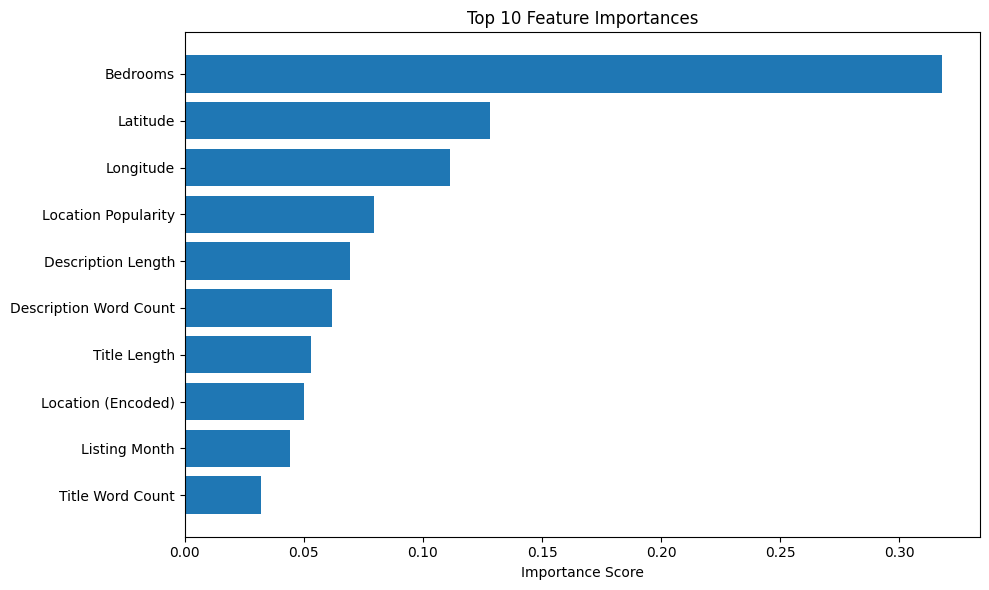


PREDICTING ON TEST DATA

Predictions completed for 1873 listings

Sample predictions:
   ID  Budget_Prob  Standard_Prob  Luxury_Prob
0   1     0.836294       0.148180     0.015526
1   6     0.004765       0.287856     0.707379
2  18     0.000845       0.569125     0.430030
3  25     0.142520       0.783137     0.074343
4  37     0.103944       0.648737     0.247319


In [ ]:
#The running logic

#Loading the test and training sets - ask claude why would this would be leaking 
df_train = pd.read_csv('Test1 1\\Test1\\train.csv',encoding='cp1252')
df_test = pd.read_csv('Test1 1\\Test1\\test.csv',encoding='cp1252')

#run the cleaning dataset function
df_train_clean = cleaning_data(df_train) 
df_test_clean = cleaning_data(df_test) 
df_train_clean

#run feature engineering 
df_train_clean_fe = feature_engineering(df_train_clean)
df_test_clean_fe = feature_engineering(df_test_clean)

#encode the catergorical features
df_train_encoded,df_test_encoded = encodingcats(df_train_clean_fe, df_test_clean_fe)

#Create and train the model
model = building_training_model(df_train_encoded)

#Running test data to the model
predictions_outcome = predict_probabilities(model, df_test_encoded)


df_train_encoded


STATISTICAL ANALYSIS: COLLEGE STATION VS REST OF TEXAS

1. Data Summary:
   College Station:
      - Total listings: 192
      - Luxury listings: 31
      - Luxury proportion: 0.1615 (16.15%)

   Rest of Texas:
      - Total listings: 9006
      - Luxury listings: 690
      - Luxury proportion: 0.0766 (7.66%)

2. Statistical Test: Two-Proportion Z-Test
   H0: P(Luxury|College Station) <= P(Luxury|Rest of Texas)
   H1: P(Luxury|College Station) > P(Luxury|Rest of Texas)

   Test Results:
      - Z-statistic: 4.3280
      - P-value: 0.0000
      - Significance level: α = 0.05

3. Conclusion:
   REJECT the null hypothesis (p-value = 0.0000 < 0.05)
   The proportion of Luxury properties in College Station IS significantly
   higher than in the rest of Texas.

   Effect size (Cohen's h): 0.2661
   This represents a medium effect size.


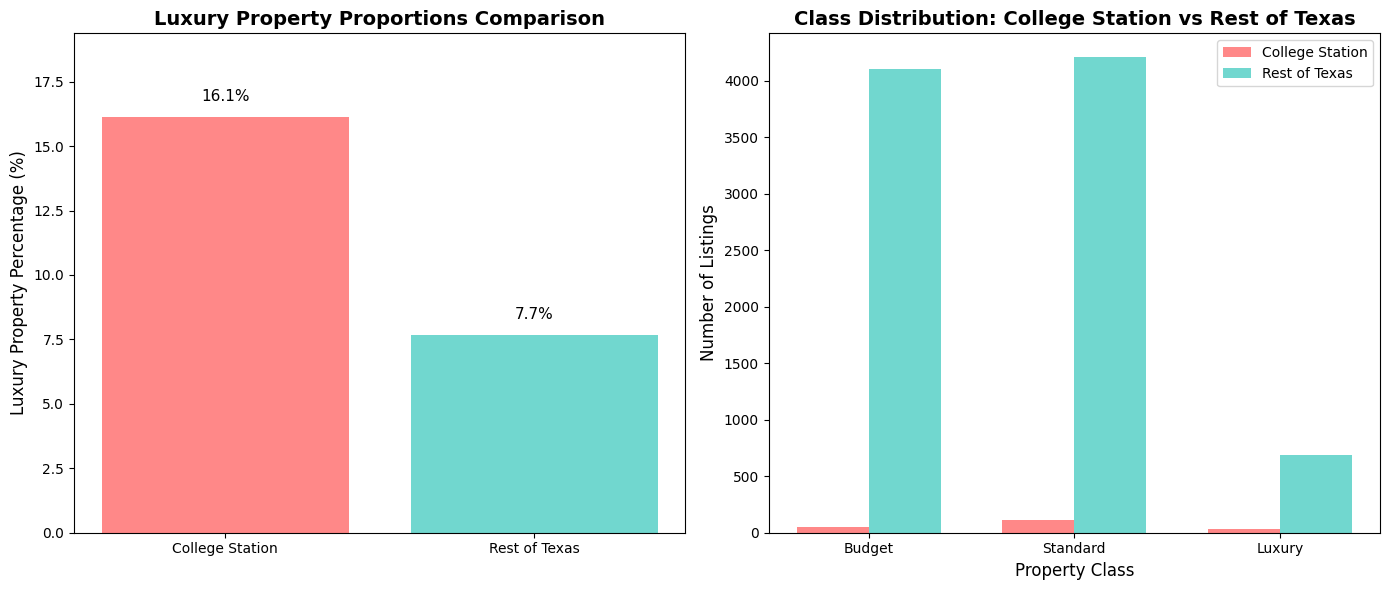

In [19]:
#College Station Question
college_station = statistical_test_college_station(df_train_encoded)